In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
frequence = pd.read_csv('data/frequentation-gares.csv', sep = ';')
frequence

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,Acheux - Franleu,87316745,80560,C,0,0,2,2,0,0,...,2,2,235,235,104,104,308,308,898,898
1,Aiguebelette-le-Lac,87741421,73610,C,4394,4394,4046,4046,3658,3658,...,4754,4754,2535,2535,3117,3117,3912,3912,4071,4071
2,Aigueperse,87734129,63260,C,86794,86794,70599,70599,55143,55143,...,75954,75954,70745,70745,77218,77218,78088,78088,75873,75873
3,Albi,87615005,81000,B,568827,711034,531922,664902,391271,489089,...,415630,519537,368147,460184,432819,541024,392651,490814,412872,516090
4,Albi Madeleine,87615195,81000,C,89396,89396,80495,80495,57591,57591,...,51855,51855,44787,44787,55019,55019,52084,52084,63723,63723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,Wilwisheim,87212175,67270,C,52980,52980,49664,49664,38081,38081,...,39515,39515,39001,39001,33171,33171,32877,32877,34845,34845
3006,Wisches,87214676,67130,C,89057,89057,98781,98781,85596,85596,...,88851,88851,91479,91479,100373,100373,103452,103452,112884,112884
3007,Woincourt,87317511,80520,C,639,639,674,674,846,846,...,4995,4995,7732,7732,11946,11946,13623,13623,14320,14320
3008,Yerres,87682112,91330,B,3978128,3978128,3738278,3738278,3059573,3059573,...,4525768,4525768,4349907,4349907,4207385,4207385,3990066,3990066,3764066,3764066


On va essayer de voir ici l'évolution au cours du temps de la fréquentation des gares dans chaque département,
afin d'essayer de voir si certaines régions sont plus ou moins délaissées
On va d'abord essayer d'afficher l'évolution au cours du temps d'une seule région, admettons le département de Paris
On veut d'abord isoler le numero de déprtement, on doit donc vectoriser la fonction partie entière, j'ai donc chercher sur internet
la fonction np.floor est vectorisée

In [3]:
frequence['departement'] = np.floor(frequence['Code postal']/1000)
frequence

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015,departement
0,Acheux - Franleu,87316745,80560,C,0,0,2,2,0,0,...,2,235,235,104,104,308,308,898,898,80.0
1,Aiguebelette-le-Lac,87741421,73610,C,4394,4394,4046,4046,3658,3658,...,4754,2535,2535,3117,3117,3912,3912,4071,4071,73.0
2,Aigueperse,87734129,63260,C,86794,86794,70599,70599,55143,55143,...,75954,70745,70745,77218,77218,78088,78088,75873,75873,63.0
3,Albi,87615005,81000,B,568827,711034,531922,664902,391271,489089,...,519537,368147,460184,432819,541024,392651,490814,412872,516090,81.0
4,Albi Madeleine,87615195,81000,C,89396,89396,80495,80495,57591,57591,...,51855,44787,44787,55019,55019,52084,52084,63723,63723,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,Wilwisheim,87212175,67270,C,52980,52980,49664,49664,38081,38081,...,39515,39001,39001,33171,33171,32877,32877,34845,34845,67.0
3006,Wisches,87214676,67130,C,89057,89057,98781,98781,85596,85596,...,88851,91479,91479,100373,100373,103452,103452,112884,112884,67.0
3007,Woincourt,87317511,80520,C,639,639,674,674,846,846,...,4995,7732,7732,11946,11946,13623,13623,14320,14320,80.0
3008,Yerres,87682112,91330,B,3978128,3978128,3738278,3738278,3059573,3059573,...,4525768,4349907,4349907,4207385,4207385,3990066,3990066,3764066,3764066,91.0


On regroupe ensuite par départements et on veut, pour chaque année, sommer les fréquentations de chaque département

On garde uniquement les colonnes qui nous intéressent

In [4]:
T = ['Total Voyageurs 2023', 'Total Voyageurs 2022', 'Total Voyageurs 2021', 'Total Voyageurs 2020', 'Total Voyageurs 2019', 
     'Total Voyageurs 2018', 'Total Voyageurs 2017', 'Total Voyageurs 2016', 'Total Voyageurs 2015', 'departement']
isolé = frequence[T].groupby( by = 'departement')
tot = isolé.sum()
tot.columns = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]
tot

,2023,2022,2021,2020,2019,2018,2017,2016,2015
departement,,,,,,,,,
1.0,9815479,9076197,7002990,5618650,8649911,7939025,8628737,8300028,8454277
2.0,8287508,7371600,6043766,4905623,6902960,6806261,7406849,7294130,7531348
3.0,3059253,2932596,2309374,1850282,2869989,2675575,2946817,2815151,2965111
4.0,222139,191022,137035,89231,194418,241562,308344,283524,287036
5.0,904643,809467,577337,468399,823679,791640,957326,958079,999246
...,...,...,...,...,...,...,...,...,...
92.0,149772062,159805208,126776027,59200677,155559866,153588786,152927558,150248055,145104160
93.0,309560179,277014447,222576113,151744988,293659090,294174512,288305462,277191723,271730767
94.0,98707055,92765733,87744621,57681818,110062498,111417091,112807571,112148916,111099812


Concentrons nous sur 1 departement, par exemple 31

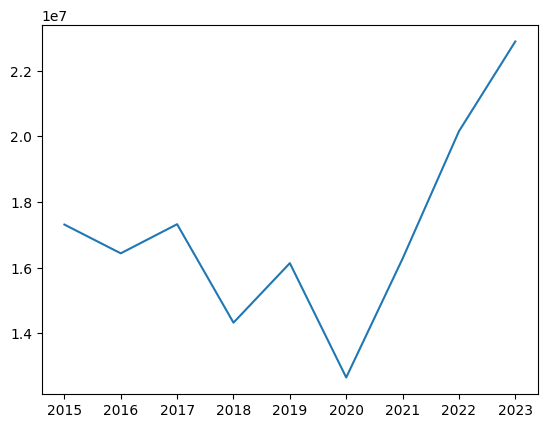

In [5]:
HG = tot.loc[31]
plt.plot(HG)
plt.show();

On voit ici que le covid fausse complétement les stats, on se propose donc d'évaluer le taux de progression post covid

In [6]:
tot = tot.loc[:, [2020, 2021, 2022, 2023]]
tot.loc[31, :]

2020    12658019
2021    16274670
2022    20151566
2023    22885051
Name: 31.0, dtype: int64

Puis, pour chacun des départements, on va estimer le taux d'évolution de la fréquentation de ces gares
Pour chacune des lignes, on va effectuer une régression linéaire et afficher la pente ainsi que le coefficient r
On essaie avec la haute garonne

In [7]:
X = [2020, 2021, 2022, 2023]
T = linregress(X, tot.loc[31, :])
pente, r = T[0], T[2] 
print(pente, r)

3455799.2 0.9975513563183643


On incrémente donc sur chaque ligne et on stocke tout ça dans des listes qu'on intégrera ensuite dans la dataframe Tot

In [8]:
#R = []
#Taux = []
#for i in range (1, 99):
#    T = linregress(X, tot.loc[i, :])
#    R.append(T[2])
#    Taux.append(T[0])
#Taux
    
    

Si on exécute cette cellule, elle renvoie une erreur au niveau de l'indice 20. 
Pour une raison inconnue, le département 20 pose problème, on regarde donc plus précisément.

In [9]:
tot

,2020,2021,2022,2023
departement,,,,
1.0,5618650,7002990,9076197,9815479
2.0,4905623,6043766,7371600,8287508
3.0,1850282,2309374,2932596,3059253
4.0,89231,137035,191022,222139
5.0,468399,577337,809467,904643
...,...,...,...,...
92.0,59200677,126776027,159805208,149772062
93.0,151744988,222576113,277014447,309560179
94.0,57681818,87744621,92765733,98707055


On a en fait 95 lignes donc pas tous les départements 
Il faut donc essayer de parcourir l'index 

In [10]:
R = []
Taux = []
for i in tot.index:
    T = linregress(X, tot.loc[i, :])
    R.append(T[2])
    Taux.append(T[0])


In [11]:
tot['Taux évolution'] = Taux
tot['Fiabilité de la regression'] = R

In [12]:
tot

,2020,2021,2022,2023,Taux évolution,Fiabilité de la regression
departement,,,,,,
1.0,5618650,7002990,9076197,9815479,1466369.4,0.985949
2.0,4905623,6043766,7371600,8287508,1147348.9,0.997695
3.0,1850282,2309374,2932596,3059253,425013.5,0.973698
4.0,89231,137035,191022,222139,45271.1,0.994588
5.0,468399,577337,809467,904643,154086.2,0.985854
...,...,...,...,...,...,...
92.0,59200677,126776027,159805208,149772062,30474333.6,0.868725
93.0,151744988,222576113,277014447,309560179,52788390.7,0.987052
94.0,57681818,87744621,92765733,98707055,12809682.3,0.905961


On trace maintenant le diagramme en fonction des départements pour voir quels départements ont eu un taux d'évolution le plus élevé

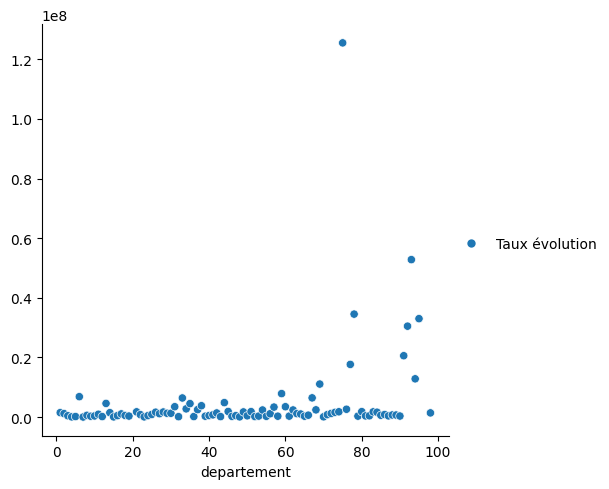

In [13]:
sns.relplot(tot[['Taux évolution']]) ;

On voit ici des départements qui sortent vraiment du lot

In [14]:
U = tot[['Taux évolution']]
U = U.sort_values(by = 'Taux évolution')
U.tail()

,Taux évolution
departement,
92.0,30474333.6
95.0,32992036.3
78.0,34517214.0
93.0,52788390.7
75.0,125492872.8


On voit très clairement que depuis la fin du covid, les régions parisiennes ont eu une évolution en fréquentation bien plus importante
On peut avoir plusieurs interprétations:
-Simplement le fait que la densité de population est bien plus importante à Paris et surtout le nombre de personnes utilisant les transports
-Un gros investissement de la SNCF dans ces zones là
A l'intérieur même de la région parisienne, le 75 se démarque très largement
Regardons les départements où la fréquentation est la plus basse

In [15]:
U.head(10)

,Taux évolution
departement,
7.0,-90.3
15.0,44167.9
4.0,45271.1
23.0,51894.9
48.0,54423.8
70.0,71566.8
32.0,114938.9
43.0,136748.1
12.0,149005.8


L'Ardèche semble avoir eu des problèmes, on le voit même au coefficient de régression linéaire
Globalement, ces département ont eu environ une évolution en fréquentation 400 fois moins importante (très environ) que les plus gros départements
On peut donc encourager la SNCF à diversifier peut-être leur investissement dans les différents départements
Il se peut aussi qu'ils aient déjà mené des études qui montrent que ces départements n'ont pas "besoin" de plus de déplacement.